In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=1000)

In [ ]:
# Iter: 1000, loss_tol: 1e-12, gtol: 1e-12
energy = ([], [
    -5.999999908805371, -6.004217920606074, -6.014180548149322, -6.043274497981361, -6.1108115875319395,
    -6.211124968820009, -6.287094733330465, -6.316547769220902, -6.324575807342485, -6.326653340549671,
    -6.327222238947458, -6.327390512340518, -6.327444226354097, -6.327462635349257, -6.327469371992763,
    -6.327471990713322, -6.32747306702712, -6.327473532792277, -6.327473744200753
], [
    -5.9999991706105815, -6.004431880395696, -6.294332875797291, -6.330396076320867, -6.335749128080762,
    -6.336788548457937, -6.337028125345768, -6.337090607084618, -6.337108603356891, -6.337114246601293,
    -6.337116154567332, -6.337116844974902, -6.337117110755675, -6.337117219052936
], [
    -2.999999417425502, -3.0067510633843026, -3.0232055911352886, -3.0642652170287143, -3.126971326455028,
    -3.175671071529128, -3.196605514964364, -3.2035194975643093, -3.2057732073540013, -3.2065630373053797,
    -3.2068651083358986, -3.2069906952370975, -3.207047016706338, -3.2070740478332818, -3.2070878322035394,
    -3.20709525342089, -3.207099448091429, -3.207101925046063, -3.207103446472152, -3.2071044148218415,
    -3.207105051295933, -3.2071055058565436, -3.207105840940598, -3.207106087948516, -3.207106270034514,
    -3.2071064042597968, -3.207106503206731
], [
    -3.99999644656525, -4.064459802730155, -4.088548531252394, -4.109568263179317, -4.1247039753169865,
    -4.13416179813093, -4.1395890606071575, -4.1425788136666135, -4.14420474529786, -4.145091335210603,
    -4.145579943295319, -4.145853147666821, -4.146008400008692, -4.146098114852107, -4.146150834399852,
    -4.146182329339976, -4.146201449440358, -4.146213239319568, -4.146220619655711, -4.1462253074251985,
    -4.1462283270860185, -4.14623029876367, -4.146231603097899, -4.146232476904918, -4.146233069449795,
    -4.146233476005361, -4.146233758119577, -4.146233956032846, -4.146234096342899
], [
    -7.999996898179551, -8.042680543370153, -8.064638942051884, -8.086262099263436, -8.102489533791536,
    -8.112100377028204, -8.11696863002814, -8.119254518242544, -8.120303669762446, -8.120787341633925,
    -8.121014047224655, -8.121122609414055, -8.121175807152836, -8.121202487113992, -8.121216176100999,
    -8.121223356673172, -8.121227204500553, -8.12122930923605, -8.121230483502437, -8.121231151220352,
    -8.121231537904405, -8.121231765809966
])
fidelity = ([], )

ind, num = 0, 1
energy = np.array(energy[num])
fidelity = np.array(fidelity[num])

energy = energy[ind:len(fidelity)]
fidelity = fidelity[ind:]
print('Number of vec:', len(fidelity))

plt.figure(figsize=(10, 5))
plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
plt.ylabel('Fidelity', fontsize=12)
plt.xlabel('Energy', fontsize=12)
plt.scatter(energy, fidelity)
plt.plot(energy, fidelity)
plt.show()

fidelity = 1 - fidelity
plt.figure(figsize=(10, 5))
plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
plt.ylim(max(fidelity) * 2, min(fidelity) / 2)
plt.ylabel('1 - Fidelity', fontsize=12)
plt.xlabel('Energy', fontsize=12)
plt.scatter(energy, fidelity)
plt.plot(energy, fidelity)
plt.yscale('log')
plt.show()

Number of vec: 19


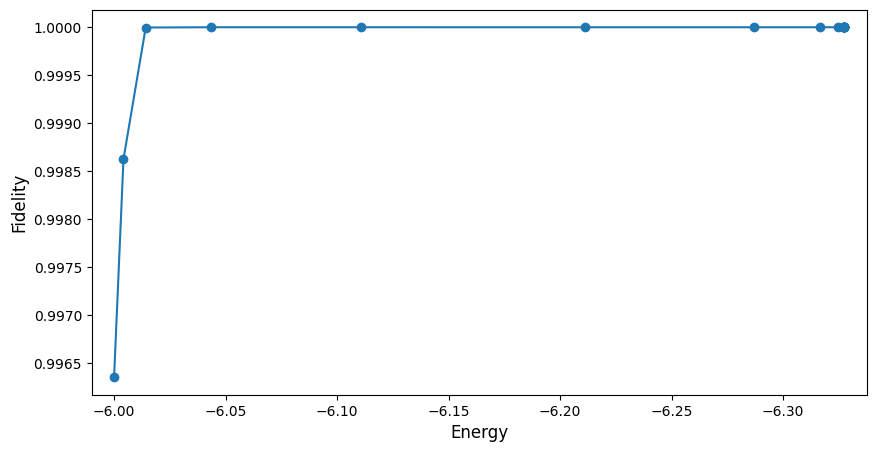

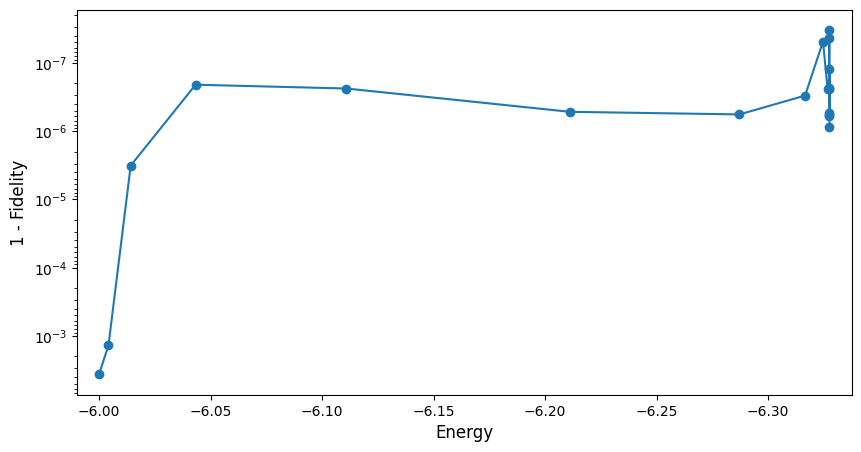

In [2]:
# Iter: 500, loss_tol: 1e-12, gtol: 1e-12
energy = ([-6, -6.3, -6.32], [
    -5.999999908805371, -6.004217920606074, -6.014180548149322, -6.043274497981361, -6.1108115875319395,
    -6.211124968820009, -6.287094733330465, -6.316547769220902, -6.324575807342485, -6.326653340549671,
    -6.327222238947458, -6.327390512340518, -6.327444226354097, -6.327462635349257, -6.327469371992763,
    -6.327471990713322, -6.32747306702712, -6.327473532792277, -6.327473744200753
], [
    -5.9999991706105815, -6.004431880395696, -6.294332875797291, -6.330396076320867, -6.335749128080762,
    -6.336788548457937, -6.337028125345768, -6.337090607084618, -6.337108603356891, -6.337114246601293,
    -6.337116154567332, -6.337116844974902, -6.337117110755675, -6.337117219052936
], [
    -2.999999417425502, -3.0067510633843026, -3.0232055911352886, -3.0642652170287143, -3.126971326455028,
    -3.175671071529128, -3.196605514964364, -3.2035194975643093, -3.2057732073540013, -3.2065630373053797,
    -3.2068651083358986, -3.2069906952370975, -3.207047016706338, -3.2070740478332818, -3.2070878322035394,
    -3.20709525342089, -3.207099448091429, -3.207101925046063, -3.207103446472152, -3.2071044148218415,
    -3.207105051295933, -3.2071055058565436, -3.207105840940598, -3.207106087948516, -3.207106270034514,
    -3.2071064042597968, -3.207106503206731
], [
    -3.99999644656525, -4.064459802730155, -4.088548531252394, -4.109568263179317, -4.1247039753169865,
    -4.13416179813093, -4.1395890606071575, -4.1425788136666135, -4.14420474529786, -4.145091335210603,
    -4.145579943295319, -4.145853147666821, -4.146008400008692, -4.146098114852107, -4.146150834399852,
    -4.146182329339976, -4.146201449440358, -4.146213239319568, -4.146220619655711, -4.1462253074251985,
    -4.1462283270860185, -4.14623029876367, -4.146231603097899, -4.146232476904918, -4.146233069449795,
    -4.146233476005361, -4.146233758119577, -4.146233956032846, -4.146234096342899
], [
    -7.999996898179551, -8.042680543370153, -8.064638942051884, -8.086262099263436, -8.102489533791536,
    -8.112100377028204, -8.11696863002814, -8.119254518242544, -8.120303669762446, -8.120787341633925,
    -8.121014047224655, -8.121122609414055, -8.121175807152836, -8.121202487113992, -8.121216176100999,
    -8.121223356673172, -8.121227204500553, -8.12122930923605, -8.121230483502437, -8.121231151220352,
    -8.121231537904405, -8.121231765809966
])
fidelity = ([0.99544003609273223887, 0.99999831226827295971, 0.99999982919308338936], [
    0.9963501115273821, 0.9986255378358114, 0.9999968049307384, 0.9999997914850758, 0.9999997630235711,
    0.9999994795736982, 0.9999994315750385, 0.9999996991612291, 0.9999999513689395, 0.999999756578521,
    0.9999997569946619, 0.9999999668131621, 0.9999999571274998, 0.9999994559845724, 0.999999877044508,
    0.9999997666967089, 0.9999994142024324, 0.9999994079751954, 0.9999991333469795
], [
    0.9936371491921793, 0.9998413895065205, 0.9999999238848767, 0.9999998261529646, 0.9999998730835418,
    0.9999992583367974, 0.9999999490655138, 0.9999999782529083, 0.9999994306438991, 0.99999998229514,
    0.9999995634555819, 0.9999986772332452, 0.9999997568556303, 0.9999992261914328
], [
    0.9977384054625194, 0.9989687621056889, 0.9999994980624193, 0.9999998579236938, 0.999999554952602,
    0.9999987500964322, 0.9999964864347995, 0.9999982856647585, 0.999999453573, 0.9999995551704526, 0.9999992718846639,
    0.9999999701829814, 0.9999993775394753, 0.9999991911909039, 0.9999998769643839, 0.9999991063364582,
    0.999999593737054, 0.9999974337587729, 0.999997273117633, 0.9999999094956995, 0.9999944776719654,
    0.9999975582651637, 0.9999989867138329, 0.9999999730393971, 0.999999342961981, 0.9999998004654385, 0.999999997472015
], [
    0.9765102570471846, 0.9999995635887, 0.9999990165586237, 0.999999992722676, 0.9999996115552525, 0.9999999939486682,
    0.9999994060639792, 0.9681434810304175, 0.9999999081528654, 0.9999999932183138, 0.9999999968256156,
    0.9999998277365552, 0.9999998261919906, 0.9999995425325316, 0.9171502514565013, 0.999999992429967,
    0.9999999511651126, 0.9999990913965662, 0.9999997524760061, 0.9999998121900529, 0.9999999925896396,
    0.9999984536591913, 0.9999990869493365, 0.9999998197242934, 0.9999998796175735, 0.9999998446402523,
    0.999999917076173, 0.9999987717367818, 0.9999998005328963
], [
    0.9985610759892491, 0.9999990120382192, 0.9999999505590405, 0.9999988868487458, 0.9999977908663584,
    0.9999998749916754, 0.9999988653547986, 0.9999998866431019, 0.9999998604243351, 0.9999999619204065,
    0.9999990184561406, 0.9999996040823064, 0.999999830276298, 0.9999996156967483, 0.9999995599043443,
    0.9999999765103684, 0.9999991302137238, 0.9999862447852008, 0.9999999856409315, 0.9999992354414939,
    0.9999997374931163, 0.9999986284809315
])

ind, num = 0, 1
energy = np.array(energy[num])
fidelity = np.array(fidelity[num])

energy = energy[ind:len(fidelity)]
fidelity = fidelity[ind:]
print('Number of vec:', len(fidelity))

plt.figure(figsize=(10, 5))
plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
plt.ylabel('Fidelity', fontsize=12)
plt.xlabel('Energy', fontsize=12)
plt.scatter(energy, fidelity)
plt.plot(energy, fidelity)
plt.show()

fidelity = 1 - fidelity
plt.figure(figsize=(10, 5))
plt.xlim(max(energy) + 0.01, min(energy) - 0.01)
plt.ylim(max(fidelity) * 2, min(fidelity) / 2)
plt.ylabel('1 - Fidelity', fontsize=12)
plt.xlabel('Energy', fontsize=12)
plt.scatter(energy, fidelity)
plt.plot(energy, fidelity)
plt.yscale('log')
plt.show()